<a href="https://colab.research.google.com/github/Suganthan-Thamotharampillai/Data-Science-Project/blob/main/12_01_Week_2_Project_2_Part_4_Suganthan_Thamotharampillai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2** - Part 4

- `Suganthan Thamotharampillai`
- `12.01.2022`

In [ ]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config; set_config(display='diagram')
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score, roc_auc_score, RocCurveDisplay
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor, KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

In [ ]:
## LOAD DATASET
# House Rent in India Prediction Dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQc-9ziMxYutF1vkG2ewQXZE4AJrGO7d1IzxV4F_ejRnzNOm6rKOtakovajeGdU6Fq_wgnyxshZCk2V/pub?gid=905022541&single=true&output=csv"
data = pd.read_csv(url, usecols=['BHK','Rent','Size','Floor','Area Type','Area Locality','City','Furnishing Status','Tenant Preferred','Bathroom'])
df = data.copy()
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


<br><h1>House Rent in India Prediction Dataset

**1) Source of data**

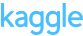

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

**2) Brief description of data**

**About Dataset**

This Dataset contains information about Houses available for Renting in parts of India

In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.



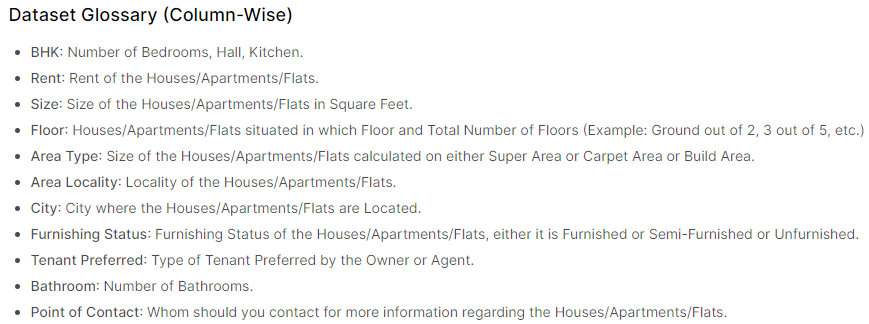

**3) What is the target?**

**The Target**

The **Target** of this dataset is to predict the **Rent** of Houses in some cities of India based on City, Area, House Type, Size, Number of Bedrooms, and Furnished Status.

In [ ]:
# TARGET
df[['Rent']].head()

,Rent
0,10000
1,20000
2,17000
3,10000
4,7500


**4) Is this a classification or regression problem?**

The Model uses many features to predict a **Numerical Target**, the rent of the houses, which varies in numbers based on many factors. So,

This is a **Regression Problem**

**5) How many features?**

In [ ]:
# FEATURES
print('\nThere are', df.shape[1], 'features in total\n')
for column in df.columns: print(column.upper())


There are 10 features in total

BHK
RENT
SIZE
FLOOR
AREA TYPE
AREA LOCALITY
CITY
FURNISHING STATUS
TENANT PREFERRED
BATHROOM


**6) How many rows of data?**

In [ ]:
# ROWS
print('There are', df.shape[0], 'rows in total')

There are 4746 rows in total


**7) What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?**

**DATA OVERVIEW**

**Cleaning Challenges**: Data is already Well Cleaned. It is not Duplicated, and is all Non-Null Value

**Exploring Challenges**: Since data is already well cleaned, Exploring for Inconsistency or Erroneous Values is likely less

**Modeling Challenges**: Data needed for modeling in the dataset are mostly Categorical. Modeling is going to be Challenging

<br><h1> <b>Exploratory Data Analysis

<ol><li><b>Exploring for Duplicates, Missing Values and Inconsistencies

In [ ]:
## EXPLORE DATASET
#  DATA OVERVIEW
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 370.9+ KB


None

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
# DATA CLEANING
# Identifying Duplicates
print('There are', df.duplicated().sum(), 'duplicates')

There are 8 duplicates


In [ ]:
# Addressing Duplicates
df.drop_duplicates(inplace=True)
print('There are now', df.duplicated().sum(), 'duplicates')

There are now 0 duplicates


In [ ]:
# Identifying Missing Values
print('There are', df.isna().sum().sum(), 'missing values\n')
df.isna().sum()

There are 0 missing values



BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

In [ ]:
# Identifying Inconsistencies in CATEGORICAL data
for col in df.select_dtypes(include='object').columns: print(f"Column:{col}\n{df[col].value_counts(dropna=False)}\n{(45*'-')}")

Column:Floor
1 out of 2         378
Ground out of 2    350
2 out of 3         312
2 out of 4         305
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64
---------------------------------------------
Column:Area Type
Super Area     2445
Carpet Area    2291
Built Area        2
Name: Area Type, dtype: int64
---------------------------------------------
Column:Area Locality
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Miyapur, NH 9                              22
Velachery                                  22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyde

In [ ]:
## Identifying Erroneous values in NUMERICAL data
for col in df.select_dtypes(include='number').columns: print(f"Column:{col}\n{df[col].value_counts(dropna=False)}\n{(37*'-')}")

Column:BHK
2    2264
1    1164
3    1096
4     187
5      19
6       8
Name: BHK, dtype: int64
-------------------------------------
Column:Rent
15000    275
10000    248
12000    238
20000    174
8000     161
        ... 
4600       1
79500      1
76000      1
45002      1
5800       1
Name: Rent, Length: 243, dtype: int64
-------------------------------------
Column:Size
1000    240
600     225
800     220
1200    193
500     192
       ... 
2770      1
1252      1
904       1
721       1
855       1
Name: Size, Length: 615, dtype: int64
-------------------------------------
Column:Bathroom
2     2291
1     1470
3      747
4      154
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64
-------------------------------------


<br>

**Handling** Outliers

,BHK,Rent,Size,Bathroom
count,4738.0,4738.0,4738.0,4738.0
mean,2.0,34950.0,967.0,2.0
std,1.0,78128.0,634.0,1.0
min,1.0,1200.0,10.0,1.0
25%,2.0,10000.0,550.0,1.0
50%,2.0,16000.0,850.0,2.0
75%,3.0,33000.0,1200.0,2.0
max,6.0,3500000.0,8000.0,10.0


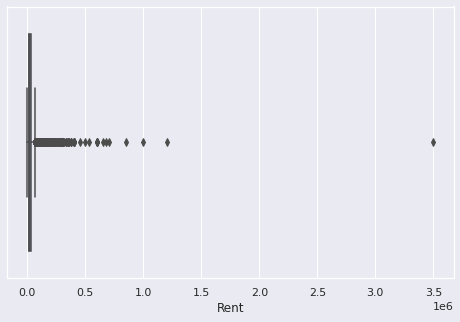

In [ ]:
## SUMMARY STATISTICS
display(round(df.describe()))
plt.figure(facecolor='#eaeaf2');
sns.boxplot(x='Rent', data=df);

Old Shape:  (4738, 10)
New Shape:  (4221, 10)


,BHK,Rent,Size,Bathroom
count,4221.0,4221.0,4221.0,4221.0
mean,2.0,19288.0,872.0,2.0
std,1.0,13826.0,485.0,1.0
min,1.0,1200.0,10.0,1.0
25%,1.0,9500.0,520.0,1.0
50%,2.0,15000.0,800.0,2.0
75%,2.0,25000.0,1100.0,2.0
max,6.0,67000.0,4200.0,7.0


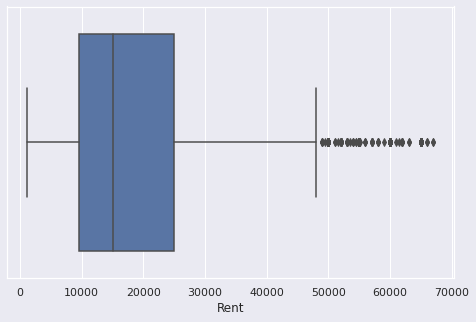

In [ ]:
## REMOVING OUTLIERS
# Identifying Interquartile Range
# IQR
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
 
# Bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the Outliers
df = df[~((df['Rent'] < lower_bound) | (df['Rent'] > upper_bound))]

# New Summary Statistics
print("New Shape: ", df.shape)
display(round(df.describe()))
plt.figure(facecolor='#eaeaf2');
sns.boxplot(x='Rent', data=df);

<br><h1><b>Visualizations

**Univariate** Exploratory Visualization

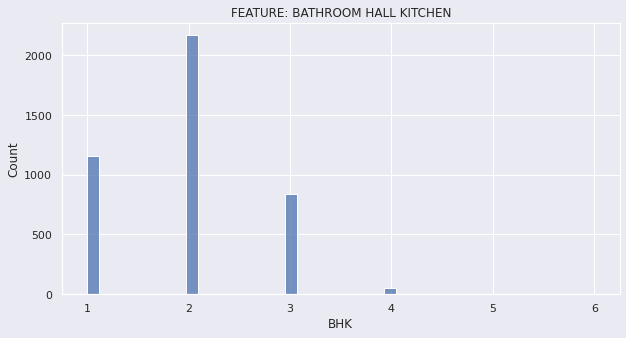

In [ ]:
# UNIVARIATE FEATURE VISUALS
# FEATURE:'BHK'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(10,5)}); sns.histplot(data=df, x='BHK').set(title='FEATURE: BATHROOM HALL KITCHEN');

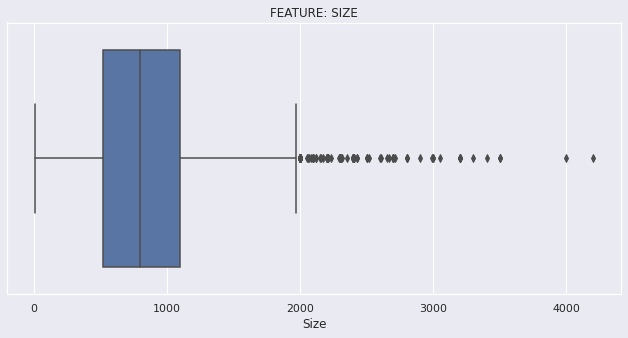

In [ ]:
# FEATURE:'SIZE'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(11,5)}); sns.boxplot(data=df, x='Size').set(title='FEATURE: SIZE');

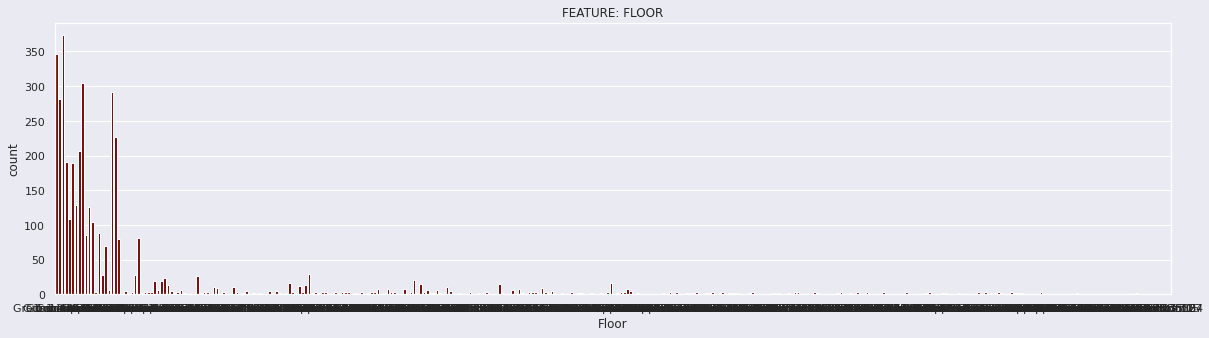

In [ ]:
# FEATURE:'FLOOR'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(20,5)}); sns.countplot(data=df, x=df["Floor"], color = 'darkred').set(title='FEATURE: FLOOR');

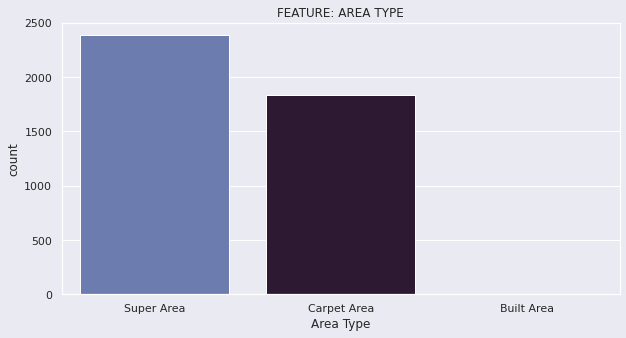

In [ ]:
# FEATURE:'AREA TYPE'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(10,5)}); sns.countplot(data=df, x=df["Area Type"], palette = "twilight").set(title='FEATURE: AREA TYPE');

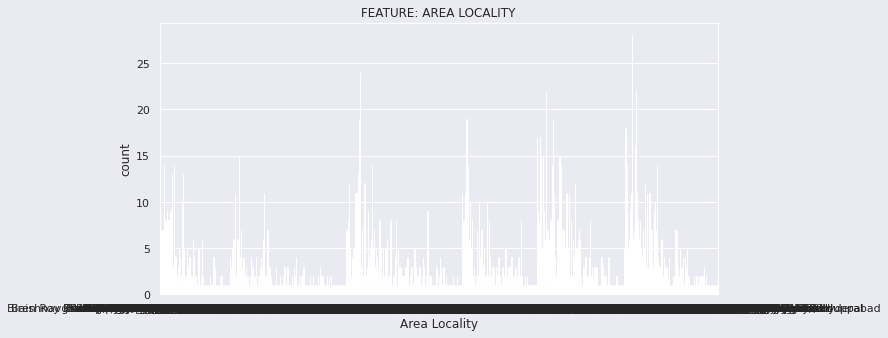

In [ ]:
# FEATURE:'AREA LOCALITY'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(10,5)}); sns.countplot(data=df, x=df["Area Locality"]).set(title='FEATURE: AREA LOCALITY');

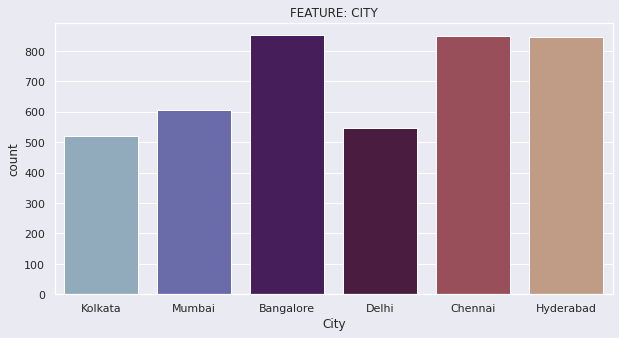

In [ ]:
# FEATURE:'CITY'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(10,5)}); sns.countplot(data=df, x=df["City"], palette='twilight').set(title='FEATURE: CITY'); 

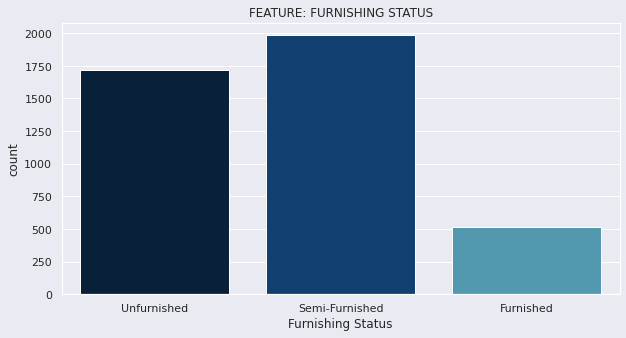

In [ ]:
# FEATURE:'FURNISHING STATUS'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(10,5)}); sns.countplot(data=df, x=df["Furnishing Status"], palette='ocean').set(title='FEATURE: FURNISHING STATUS');

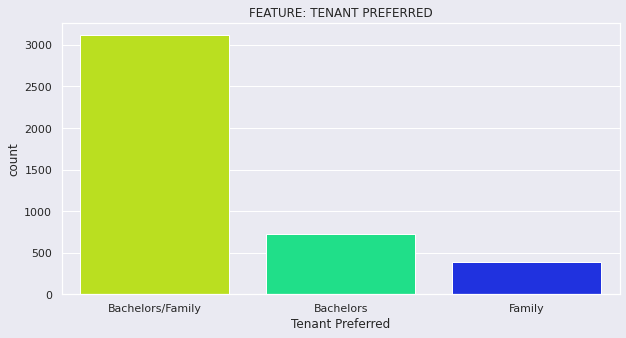

In [ ]:
# FEATURE:'TENANT PREFERRED'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(10,5)}); sns.countplot(data=df, x=df["Tenant Preferred"], palette='gist_rainbow').set(title='FEATURE: TENANT PREFERRED');

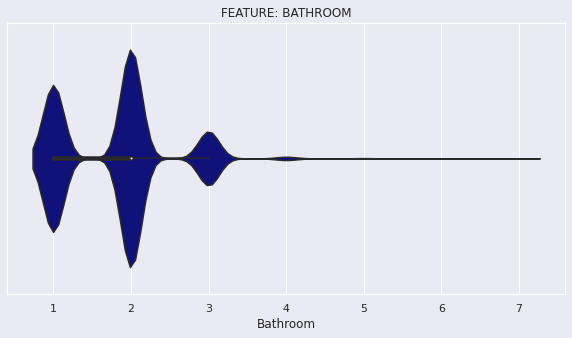

In [ ]:
# TARGET:'BATHROOM'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(11,5)}); 
sns.violinplot(x=df['Bathroom'], data=df, height=.03, color='darkblue').set(title='FEATURE: BATHROOM');

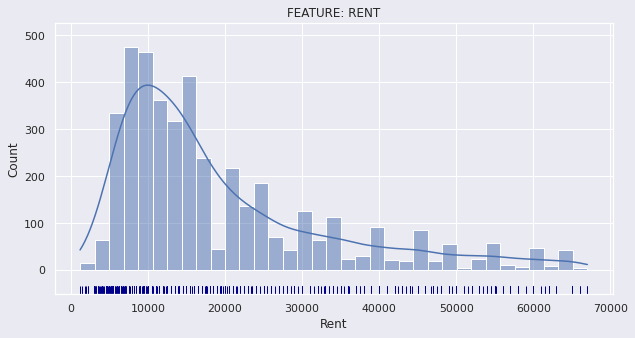

In [ ]:
# TARGET:'RENT'
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(10,5)}); 
sns.rugplot(x='Rent', data=df, height=.03, color='darkblue').set(title='FEATURE: RENT');sns.histplot(x='Rent', data=df, kde=True);

<br>

**CORRELATION**

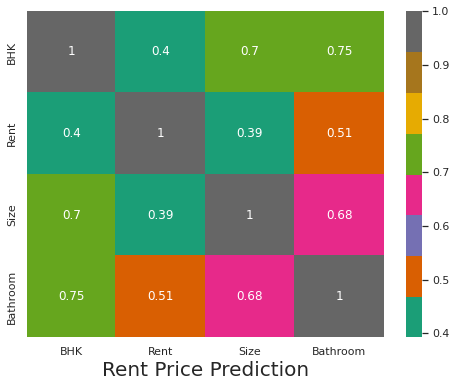

In [ ]:
# CORRELATION
sns.heatmap(df.corr(), cmap = 'Dark2', annot = True).set_xlabel("Rent Price Prediction", fontsize = 20);
sns.set(rc = {'figure.figsize':(8,6)}); df.corr(method='pearson');

- Bathroom in Bathroom|Hall|Kitchen(BHK) requirements fits well and has a high correlation
- Bathroom and size requirement goes hand in hand and has a very positive correlation
- Bathroom and its corresponding rent has a moderate correlation

<br>

**Multivariate** Exploratory Visualizations

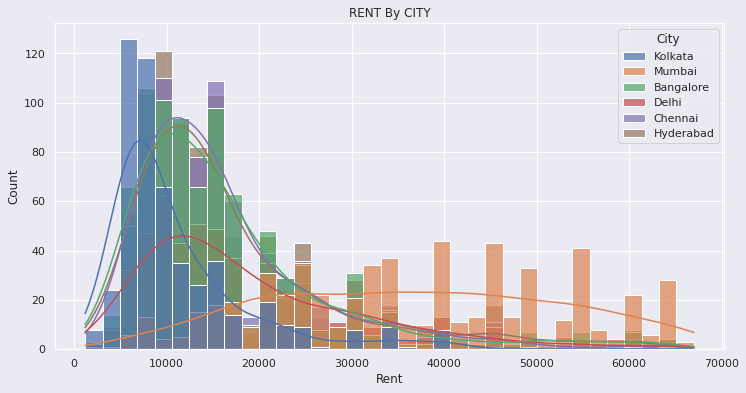

In [ ]:
# Multivariate Exploratory Visualizations 1
plt.figure(facecolor='#eaeaf2');
sns.set(rc = {'figure.figsize':(12,6)});
sns.histplot(data = df, x = 'Rent', hue = 'City', alpha=.7, kde=True).set_title('RENT By CITY');

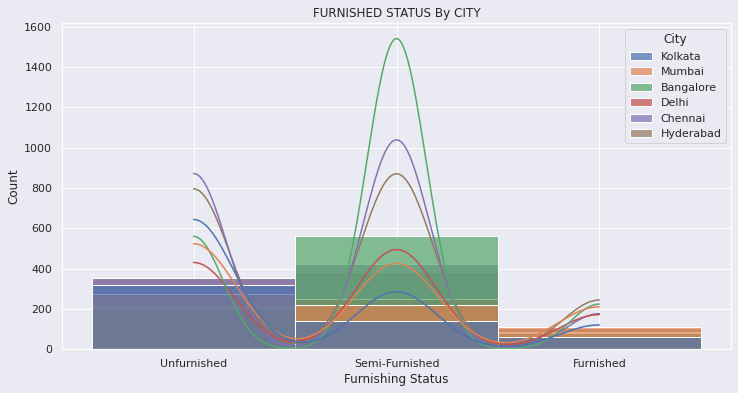

In [ ]:
# Multivariate Exploratory Visualizations 2
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(12,6)});
sns.histplot(data = df, x = 'Furnishing Status', hue = 'City', alpha=.7, kde=True).set_title('FURNISHED STATUS By CITY');

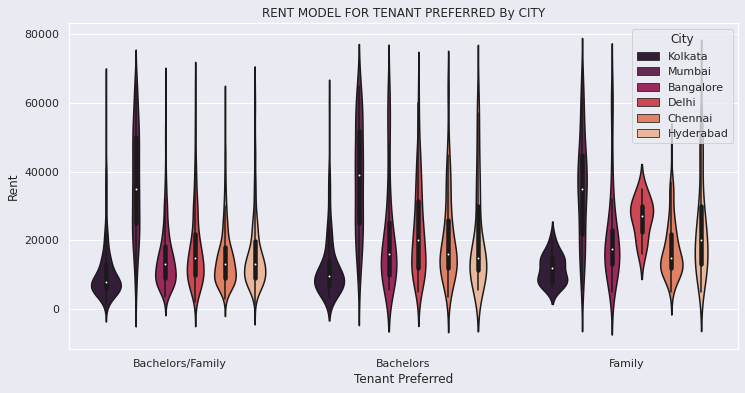

In [ ]:
# Multivariate Exploratory Visualizations 3
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(12,6)}); 
sns.violinplot(data=df, x='Tenant Preferred', y='Rent', hue='City', palette = 'rocket').set(title='RENT MODEL FOR TENANT PREFERRED By CITY');

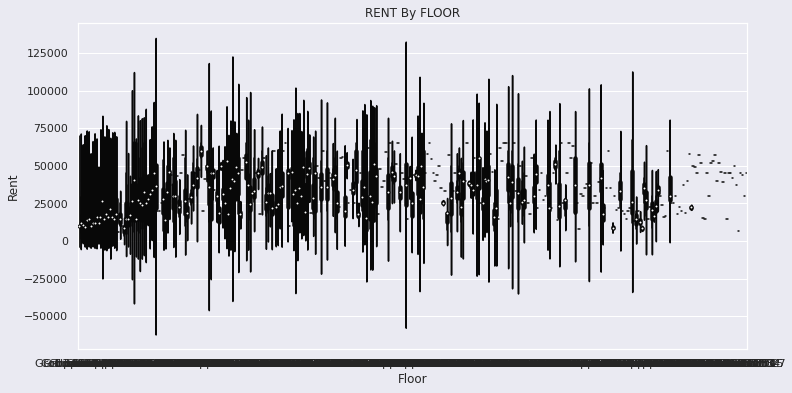

In [ ]:
# Multivariate Exploratory Visualizations 4
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(12,6)}); 
sns.violinplot(data=df, x='Floor', y='Rent', palette = 'rocket').set(title='RENT By FLOOR');

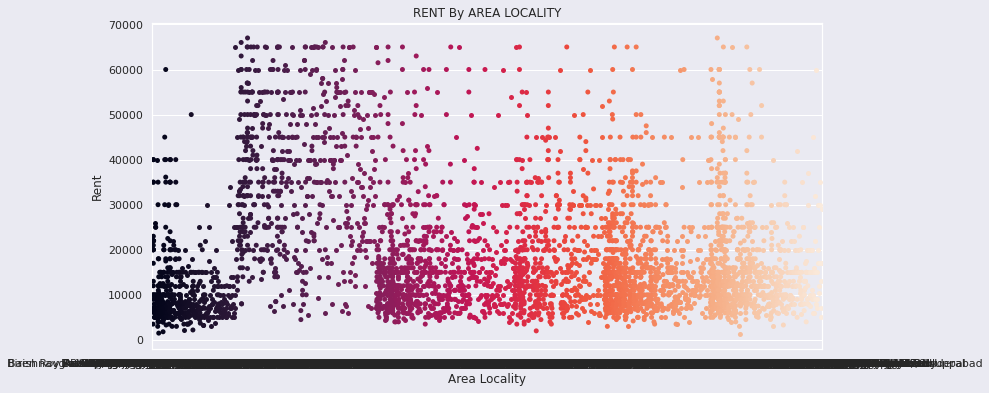

In [ ]:
# Multivariate Exploratory Visualizations 5
plt.figure(facecolor='#eaeaf2'); sns.set(rc = {'figure.figsize':(12,6)}); 
sns.stripplot(data=df, x='Area Locality', y='Rent', palette = 'rocket').set(title='RENT By AREA LOCALITY');

<br><h2> <b>PRE-PROCESSING

<ol start=1><li><b>Identify the features (X) and target (y): "Rent" column is target

In [ ]:
## PRE-PROCESSING
#  Define Features(X) and target(y)
X = df.drop(columns=['Rent'])
y = df['Rent']

# Display X, y
display(X.head())
display(pd.DataFrame(y).head())

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


,Rent
0,10000
1,20000
2,17000
3,10000
4,7500


<ol start=2><li><b>Perform Train Test Split

In [ ]:
## TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
display(X_train.head(), X_train.shape)

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
3593,3,1400,1 out of 3,Super Area,"Madhavaram, Guntur Chennai Highway",Chennai,Semi-Furnished,Bachelors/Family,2
3678,1,550,Ground out of 1,Super Area,Anna Nagar,Chennai,Semi-Furnished,Bachelors/Family,1
4424,1,600,1 out of 3,Super Area,"Domalguda, Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,1
4270,2,700,2 out of 3,Super Area,Meerpet,Hyderabad,Unfurnished,Bachelors/Family,2
2059,1,550,3 out of 6,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors/Family,1


(3165, 9)

<ol start=3><li><b>Create a Preprocessing Object to prepare the dataset for Machine Learning

In [ ]:
## PREPROCESSING OBJECT
## USE PIPELINES AND COLUMN TRANSFORMERS
## INSTANTIATE COLUMN SELECTORS
# Ordinal Selector
ord_selector = df[['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']].columns

# Nominal Selector
nom_selector = df[['Floor', 'Area Locality']].columns

In [ ]:
## INSTANTITATE TRANSFORMERS
# One-hot Encode Nominal Features
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Scale Numeric Features
scaler = StandardScaler()

In [ ]:
## INSTANTITATE PIPELINES
# Ordinal Pipeline
# Category
print(df['Area Type'].value_counts(),'\n')
print(df['City'].value_counts(),'\n')
print(df['Furnishing Status'].value_counts(),'\n')
print(df['Tenant Preferred'].value_counts())

Super Area     2382
Carpet Area    1837
Built Area        2
Name: Area Type, dtype: int64 

Bangalore    851
Chennai      850
Hyderabad    845
Mumbai       605
Delhi        548
Kolkata      522
Name: City, dtype: int64 

Semi-Furnished    1983
Unfurnished       1720
Furnished          518
Name: Furnishing Status, dtype: int64 

Bachelors/Family    3112
Bachelors            726
Family               383
Name: Tenant Preferred, dtype: int64


In [ ]:
# Labels
Area_Type_label = ['Built Area', 'Carpet Area', 'Super Area']
City_label = ['Kolkata', 'Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore']
Furnishing_Status_label = ['Semi-Furnished', 'Unfurnished', 'Furnished']
Tenant_Preferred_label = ['Bachelors', 'Bachelors/Family', 'Family']
ordered_labels = [Area_Type_label, City_label, Furnishing_Status_label, Tenant_Preferred_label]

# Encoder
ordinal = OrdinalEncoder(categories=ordered_labels)

# Pipe
ordinal_pipe = make_pipeline(ordinal)
ordinal_pipe

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(categories=[['Built Area', 'Carpet Area',
                                             'Super Area'],
                                            ['Kolkata', 'Delhi', 'Mumbai',
                                             'Hyderabad', 'Chennai',
                                             'Bangalore'],
                                            ['Semi-Furnished', 'Unfurnished',
                                             'Furnished'],
                                            ['Bachelors', 'Bachelors/Family',
                                             'Family']]))])

In [ ]:
# Nominal Pipeline
nominal_pipe = make_pipeline(ohe)
nominal_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
## INSTANTTIATE COLUMN TRANSFORMER
# Tuples for Column Transformer
ordinal_tuple = (ordinal_pipe, ord_selector)
nominal_tuple = (nominal_pipe, nom_selector)

# ColumnTransformer
preprocessor = make_column_transformer(ordinal_tuple, nominal_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Built '
                                                                              'Area',
                                                                              'Carpet '
                                                                              'Area',
                                                                              'Super '
                                                                              'Area'],
                                                                             ['Kolkata',
                                                                              'Delhi',
                                                                              'Mumbai',
                                                                              'Hyderabad',
                                                                              'Chennai',
                                                                              'Bangalore'],
                                                                             ['Semi-Furnished',
                                                                              'Unfurnished',
                                                                              'Furnished'],
                                                                             ['Bachelors',
                                                                              'Bachelors/Family',
                                                                              'Family']]))]),
                                 Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Floor', 'Area Locality'], dtype='object'))])

In [ ]:
## DATA TRANSFORMATION
#  Fit on Train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Built '
                                                                              'Area',
                                                                              'Carpet '
                                                                              'Area',
                                                                              'Super '
                                                                              'Area'],
                                                                             ['Kolkata',
                                                                              'Delhi',
                                                                              'Mumbai',
                                                                              'Hyderabad',
                                                                              'Chennai',
                                                                              'Bangalore'],
                                                                             ['Semi-Furnished',
                                                                              'Unfurnished',
                                                                              'Furnished'],
                                                                             ['Bachelors',
                                                                              'Bachelors/Family',
                                                                              'Family']]))]),
                                 Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Floor', 'Area Locality'], dtype='object'))])

In [ ]:
# Transform Train and Test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
## RESULT FOR MODELING
print('There are', (np.isnan(X_train_processed).sum().sum() + np.isnan(X_test_processed).sum().sum()), 'missing values in Training and Testing data\n')
print('All data in X_train_processed and X_test_processed are', X_train_processed.dtype if X_train_processed.dtype == X_test_processed.dtype else 'not numeric')
print('\nThe Shape of data is', X_train_processed.shape[0], 'rows and', X_train_processed.shape[1], 'columns\n')
display(pd.DataFrame(X_train_processed))

There are 0 missing values in Training and Testing data

All data in X_train_processed and X_test_processed are float64

The Shape of data is 3165 rows and 1946 columns



,0,1,2,3,4,5,6,7,8,9,...,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945
0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3161,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3162,2.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3163,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Modeling Data Overview
display(pd.DataFrame(X_train_processed).info())
display(pd.DataFrame(X_train_processed).describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Columns: 1946 entries, 0 to 1945
dtypes: float64(1946)
memory usage: 47.0 MB


None

,0,1,2,3,4,5,6,7,8,9,...,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945
count,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,...,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000
mean,1.570616,2.843602,0.653397,0.924803,0.000316,0.027804,0.000948,0.000316,0.000632,0.000316,...,0.000316,0.000316,0.000316,0.000316,0.000316,0.000316,0.000316,0.000316,0.000316,0.002212
std,0.496342,1.646701,0.690548,0.505377,0.017775,0.164437,0.030778,0.017775,0.025134,0.017775,...,0.017775,0.017775,0.017775,0.017775,0.017775,0.017775,0.017775,0.017775,0.017775,0.046984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<br><h2> <b>MODELING

<h4><b>Model 1: LINEAR REGRESSION

In [ ]:
## INSTANTIATE THE MODEL
# Instantiate Model
lin_reg = LinearRegression()

# Instantiate Standard Scaler
scaler = StandardScaler()

# Create a Modeling Pipeline
lin_reg_pipe = make_pipeline(scaler, lin_reg)

# Fit on Train
lin_reg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
## MAKE PREDICTIONS
# Create model predictions
predictions_train = lin_reg_pipe.predict(X_train_processed)
predictions_test  = lin_reg_pipe.predict(X_test_processed)

# Predicted Model
pd.concat([pd.DataFrame(predictions_train, columns=['X_train']), pd.DataFrame(predictions_test, columns=['X_test'])], axis=1).head()

,X_train,X_test
0,14514.094192,2.349609e+04
1,20866.094192,1.161409e+04
2,16902.094192,1.828609e+04
3,5934.094192,9.862094e+03
4,39218.094192,5.844356e+16


In [ ]:
# Score
print(lin_reg_pipe.score(X_train_processed, y_train))
print(lin_reg_pipe.score(X_test_processed, y_test))

-0.41246714835141285
-8.546077294167285e+27


In [ ]:
## EVALUATING MODEL
# R2 RMSE Comparison
# Regression Metrics: R2
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)
print(f"\nR2\nTraining Data: {round(train_r2*100, 1)}%\nTesting  Data: {round(test_r2*100, 1)}%\n")

# Regression Metrics: RMSE
train_RMSE = np.sqrt(mean_squared_error(y_train, predictions_train))
test_RMSE = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"RMSE\nTraining Data: {round(train_RMSE, 2)}\nTesting  Data: {round(test_RMSE, 2)}")


R2
Training Data: -41.2%
Testing  Data: -8.546077294167285e+29%

RMSE
Training Data: 16490.72
Testing  Data: 1.2635002611382472e+18


<br>**Model 1 Result**

Linear Regression Model underperformed very poorly and produced negative results. The model's predictions are -41.2% for training, and -8.54% for testing data.

There is already indication of Linear Regression not performing well in this particular dataset. It is also most likely indicative of other models not performing well in this dataset.

<br><h4>&nbsp;&nbsp;<b>Model 2: REGRESSION TREE</b>

In [ ]:
## DECISION TREE
# Instantiate Model
dec_tree = DecisionTreeRegressor(random_state = 42)

# Scaling Not Required for DecisionTreeRegressor

# Fit on Train
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
## MAKE PREDICTIONS
# Create model predictions
predictions_train = dec_tree.predict(X_train_processed)
predictions_test  = dec_tree.predict(X_test_processed)

# Predicted Model
pd.concat([pd.DataFrame(predictions_train, columns=['X_train']), pd.DataFrame(predictions_test, columns=['X_test'])], axis=1).head()

,X_train,X_test
0,22000.0,45000.0
1,13500.0,8500.0
2,9000.0,21000.0
3,6500.0,8500.0
4,18000.0,15000.0


In [ ]:
## EVALUATING MODEL
# R2 RMSE Comparison
# Regression Metrics: R2
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)
print(f"\nR2\nTraining Data: {round(train_r2*100, 1)}%\nTesting  Data: {round(test_r2*100, 1)}%\n")

# Regression Metrics: RMSE
train_RMSE = np.sqrt(mean_squared_error(y_train, predictions_train))
test_RMSE = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"RMSE\nTraining Data: {round(train_RMSE, 2)}\nTesting  Data: {round(test_RMSE, 2)}")


R2
Training Data: 99.5%
Testing  Data: 19.7%

RMSE
Training Data: 1027.86
Testing  Data: 12251.23


**Model 2 Result**

Model 2 is modeled with Decision Tree Regressor. The model predicted 19.7% of data. It might be low, but comparitive to model one, the base model 2 predictions are well higher.

<br><h4>&nbsp;&nbsp;<b>Model 3: K-NEAREST NEIGHBOR (KNN)</b>

In [ ]:
## K-NEAREST NEIGHBOR(KNN)
# Instantiate Model
knn = KNeighborsRegressor(n_neighbors=1)

# Instantiate Standard Scaler
scaler = StandardScaler()

# Create a Modeling Pipeline
knn_pipe = make_pipeline(scaler, knn)

# Fit on Train
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=1))])

In [ ]:
## MAKE PREDICTIONS
# Create model predictions
predictions_train = knn_pipe.predict(X_train_processed)
predictions_test  = knn_pipe.predict(X_test_processed)

# Predicted Model
pd.concat([pd.DataFrame(predictions_train, columns=['X_train']), pd.DataFrame(predictions_test, columns=['X_test'])], axis=1).head()

,X_train,X_test
0,22000.0,18000.0
1,13500.0,5500.0
2,9000.0,13000.0
3,6500.0,7500.0
4,18000.0,12000.0


In [ ]:
## EVALUATING MODEL
# R2 RMSE Comparison
# Regression Metrics: R2
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)
print(f"\nR2\nTraining Data: {round(train_r2*100, 1)}%\nTesting  Data: {round(test_r2*100, 1)}%\n")

# Regression Metrics: RMSE
train_RMSE = np.sqrt(mean_squared_error(y_train, predictions_train))
test_RMSE = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"RMSE\nTraining Data: {round(train_RMSE, 2)}\nTesting  Data: {round(test_RMSE, 2)}")


R2
Training Data: 98.9%
Testing  Data: 6.2%

RMSE
Training Data: 1467.57
Testing  Data: 13239.83


<b>HYPERTUNING

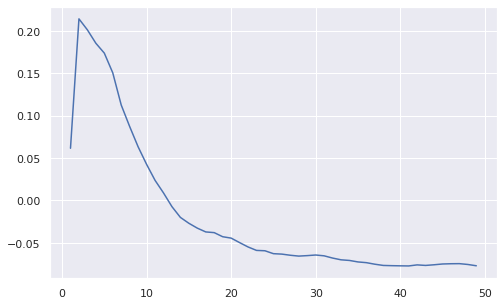

Best K value is 2 
with 0.21425082385468974 accuracy on the test set


In [ ]:
# HYPERPARAMETER TUNING
# Loop for k
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
  pipe.fit(X_train_processed, y_train)
  acc = pipe.score(X_test_processed, y_test)
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

**HYPERTUNING Using CROSS-VALIDATION**

In [ ]:
# TUNING HYPERPARAMETERS USING CROSS-VALIDATION
# Create a modeling pipeline
knn = KNeighborsRegressor()
scaler = StandardScaler()

#Pipeline
knn_pipe = make_pipeline(scaler, knn)

#Cross Validation
scores = cross_val_score(knn_pipe, X_train_processed, y_train, cv=5)

print(f'Accuracy scores for each fold are: {scores.round(2)}')
print(f'Average accuracy across folds is {np.mean(scores)}')
#Tuning Hyperparameters using Cross-Validation
# Create a range of odd integer from 1 to 19 values for the k number of neighbors
ks = range(1,20)
list(ks)
# loop through values of K
scores = []
for k in ks:
  knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
  scores.append(cross_val_score(knn_pipe, X_train_processed, y_train))
for index, k in enumerate(ks):
  mean_score = np.mean(scores[index])
  print(f'Score for n_neighbors = {k:02} is {mean_score}')

Accuracy scores for each fold are: [ 0.06  0.15  0.06  0.1  -0.02]
Average accuracy across folds is 0.07063148154746705
Score for n_neighbors = 01 is -0.029905132938700917
Score for n_neighbors = 02 is 0.10594581670427057
Score for n_neighbors = 03 is 0.10535252227018407
Score for n_neighbors = 04 is 0.08919734336895908
Score for n_neighbors = 05 is 0.07063148154746705
Score for n_neighbors = 06 is 0.056029544126676864
Score for n_neighbors = 07 is 0.04185790367160995
Score for n_neighbors = 08 is 0.02751848094035363
Score for n_neighbors = 09 is 0.021033115092020528
Score for n_neighbors = 10 is 0.011480420668499147
Score for n_neighbors = 11 is 0.002754677418729523
Score for n_neighbors = 12 is -0.0052906764721717845
Score for n_neighbors = 13 is -0.014244271180210677
Score for n_neighbors = 14 is -0.02173737356964158
Score for n_neighbors = 15 is -0.027251260333576922
Score for n_neighbors = 16 is -0.033016390646202695
Score for n_neighbors = 17 is -0.03759174543690365
Score for n_n

<br>

**Tuning: K-Nearest Neighbor KNN w/ PCA**

In [ ]:
## KNN PCA Transformation
# Instantiate Standard Scaler
scaler = StandardScaler()

# PCA with 95% Explained Variance
pca = PCA(n_components=.95)

# PCA Pipeline
pca_pipeline = make_pipeline(scaler, pca)
pca_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95))])

In [ ]:
## K-NEAREST NEIGHBOR(KNN) with PCA Transformation
# Instantiate Model
knn = KNeighborsRegressor(n_neighbors=2)

# Create a Modeling Pipeline
knn_pipe_pca = make_pipeline(pca_pipeline, knn)

# Fit on Train
knn_pipe_pca.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=2))])

In [ ]:
## MAKE PREDICTIONS
# Create model predictions
predictions_train = knn_pipe_pca.predict(X_train_processed)
predictions_test  = knn_pipe_pca.predict(X_test_processed)

# Predicted Model
pd.concat([pd.DataFrame(predictions_train, columns=['X_train']), pd.DataFrame(predictions_test, columns=['X_test'])], axis=1).head()

,X_train,X_test
0,14000.0,19000.0
1,21750.0,6250.0
2,8500.0,15000.0
3,6250.0,7000.0
4,18000.0,18500.0


In [ ]:
## EVALUATING MODEL
# R2 RMSE Comparison
# Regression Metrics: R2
train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)
print(f"\nR2\nTraining Data: {round(train_r2*100, 1)}%\nTesting  Data: {round(test_r2*100, 1)}%\n")

# Regression Metrics: RMSE
train_RMSE = np.sqrt(mean_squared_error(y_train, predictions_train))
test_RMSE = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"RMSE\nTraining Data: {round(train_RMSE, 2)}\nTesting  Data: {round(test_RMSE, 2)}")


R2
Training Data: 75.7%
Testing  Data: 19.2%

RMSE
Training Data: 6834.17
Testing  Data: 12283.88


**Model 3 Result**

Model 3 is modeled with KNN NEAREST NEIGHBOR Model. The basemodel only predicted 6.2% data, but with its optimal model performed well at k equals to 2, meaning within the next nearest 2 neighbors the model was able to predict its best position at 21.42%, taking into consideration the whole 1946 columns.

The cross validated KNN model performed very averagely despite being performed well with other datasets in the past. It's average came in at 10.59% where the other Hyperparameter KNN models performed reasonably well.

The PCA Tuning was also one of the best, where it took the base model value of 6.2% and brought it up to 19.2% which came close to its best K value neighbor of 21.42%.

Finally the Best K HyperTuning Parameter came out to be the best of all with a 21.42%  accurary.

**FINAL PRODUCTION MODEL**

> <font size=2>RECOMMENDATION<li><font size=2> <b>I Recommend The K-NEAREST NEIGHBOR (KNN) Model tuned with Best K Value of 2</b></li>


- The Linear Regression Model did very poorly with negative results.
- The Decision Tree Model did comparitively well but still was only able to explain the variance at about 19.7%
- The KNN Base Model was not able to explain the variance as much, at 6.2%, but with Hypertuning using Cross Validation and PCA Transformation, the variance that the model was able to explain went up 10.59% and 19.2% respectively.
- Finally the Optimal Model came in the form of KNN Neighbor with the best K value of 2, explaining 21.42% of variance in the data.
- The Overall Performance of this Model is below average. This model is mostly a failure. But given the low amount of data of only 4746 rows, and several columns to be one hot encoded, making the colums to spike to 1946, the model  performed very well.